In [ ]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [ ]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=["EIN", "NAME"])


In [ ]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df = pd.get_dummies(application_df)


In [ ]:
# Split our preprocessed data into our features and target arrays
X = application_df.drop(columns=["IS_SUCCESSFUL"])  # Features (drop the target column)
y = application_df["IS_SUCCESSFUL"]  # Target

# Split the preprocessed data into a training and testing dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [56]:
from tensorflow.keras import layers

# Clear the TensorFlow session to reset layer names
tf.keras.backend.clear_session()

# Define the optimized
nn_opt = tf.keras.models.Sequential()

# Add optimized layers
nn_opt.add(tf.keras.layers.Dense(units=100, activation='relu', input_shape=(X_train.shape[1],)))
nn_opt.add(tf.keras.layers.Dense(units=50, activation='relu'))
nn_opt.add(tf.keras.layers.Dense(units=25, activation='relu'))

# Output layer
nn_opt.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn_opt.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │          11,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,051 (70.51 KB)

 Trainable params: 18,051 (70.51 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
nn_opt.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the optimized model
history_opt = nn_opt.fit(X_train_scaled, y_train, epochs=100, verbose=2)


Epoch 1/100
858/858 - 3s - 3ms/step - accuracy: 0.7210 - loss: 0.5702
Epoch 2/100
858/858 - 3s - 3ms/step - accuracy: 0.7305 - loss: 0.5509
Epoch 3/100
858/858 - 1s - 1ms/step - accuracy: 0.7321 - loss: 0.5478
Epoch 4/100
858/858 - 3s - 4ms/step - accuracy: 0.7344 - loss: 0.5470
Epoch 5/100
858/858 - 2s - 2ms/step - accuracy: 0.7349 - loss: 0.5449
Epoch 6/100
858/858 - 1s - 1ms/step - accuracy: 0.7342 - loss: 0.5440
Epoch 7/100
858/858 - 3s - 3ms/step - accuracy: 0.7359 - loss: 0.5425
Epoch 8/100
858/858 - 1s - 1ms/step - accuracy: 0.7361 - loss: 0.5420
Epoch 9/100
858/858 - 3s - 3ms/step - accuracy: 0.7353 - loss: 0.5411
Epoch 10/100
858/858 - 1s - 2ms/step - accuracy: 0.7366 - loss: 0.5403
Epoch 11/100
858/858 - 2s - 2ms/step - accuracy: 0.7368 - loss: 0.5403
Epoch 12/100
858/858 - 2s - 2ms/step - accuracy: 0.7358 - loss: 0.5393
Epoch 13/100
858/858 - 2s - 2ms/step - accuracy: 0.7364 - loss: 0.5393
Epoch 14/100
858/858 - 3s - 3ms/step - accuracy: 0.7372 - loss: 0.5385
Epoch 15/100
85

In [ ]:
# Evaluate the model on the test data
model_loss_opt, model_accuracy_opt = nn_opt.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Optimized Model Loss: {model_loss_opt}, Optimized Model Accuracy: {model_accuracy_opt}")

215/215 - 0s - 2ms/step - accuracy: 0.7270 - loss: 0.5750
Optimized Model Loss: 0.5749797224998474, Optimized Model Accuracy: 0.7269679307937622


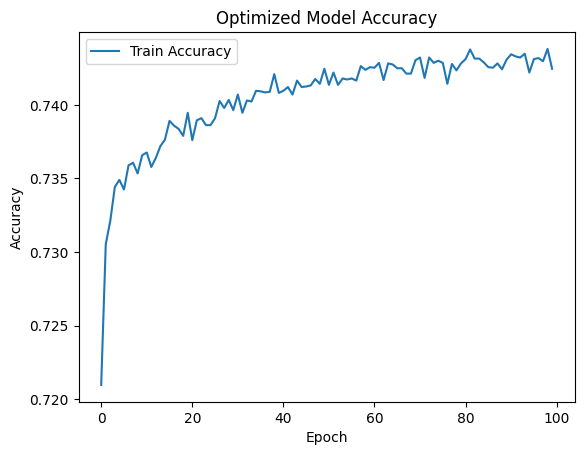

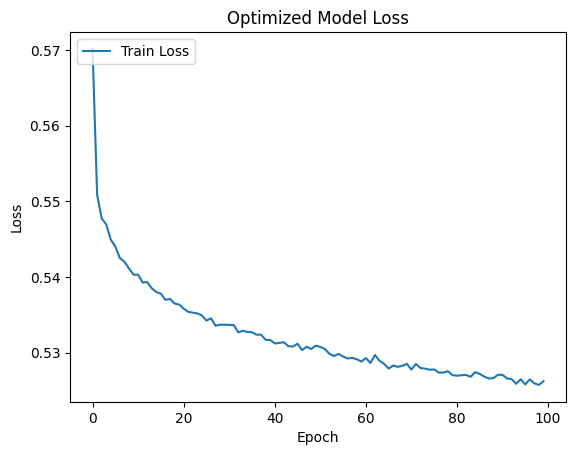

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy for the optimized model
plt.plot(history_opt.history['accuracy'], label='Train Accuracy')
plt.title('Optimized Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Save the accuracy plot before showing it
plt.savefig('optimized_model_accuracy.png')
plt.show()

# Plot loss for the optimized model
plt.plot(history_opt.history['loss'], label='Train Loss')
plt.title('Optimized Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Save the loss plot before showing it
plt.savefig('optimized_model_loss.png')
plt.show()

# Download the accuracy plot
from google.colab import files
files.download('optimized_model_accuracy.png')

# Download the loss plot
files.download('optimized_model_loss.png')


In [57]:

# Save the optimized model
from google.colab import files
nn_opt.save("AlphabetSoupCharity_Optimization.h5")
files.download("AlphabetSoupCharity_Optimization.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>